In [67]:
import numpy as np
from matplotlib import pyplot as plt

data = np.load("/Users/miles.woollacott/Desktop/Other Sciency Stuff/CDRH3_padded_Nussenzweig_with25sites.csv_rFon1D.npy")

In [194]:
data_flat = data.flatten()

In [195]:
data_null = np.where(data_flat==0, float('nan'), data_flat)
data_nuller = np.where(data_flat>250, float('nan'), np.where(data_flat<-500, float('nan'), data_flat))
data_nullest = np.where(data_nuller==0, float('nan'), data_nuller)

In [196]:
dm = 21
sites = 25
ind = np.arange(sites)
width = 1/dm

s = sites*dm

# some_dim = [data_array_flat[i], i for i in range(0, 160, 4)]
dim = dict()
for i in ind:
    dim[i] = [data_nullest[i] for i in range(i, s, dm)]  # y-axis for 0 dim
    
sums = list()

#Sum of na values per row
for i in ind:
    sums.append(sum(np.isnan(list(dim[i]))))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

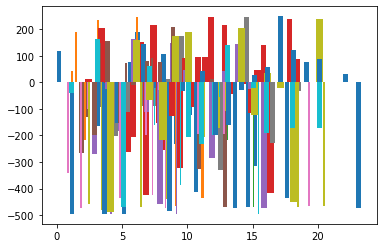

In [200]:
fig, ax = plt.subplots()

colors = [
        "tab:blue",
        "tab:orange",
        "tab:green",
        "tab:red",
        "tab:purple",
        "tab:brown",
        "tab:pink",
        "tab:gray",
        "tab:olive",
        "tab:cyan",
    ]

pi = dict()
for i in ind:
    pi[i] = ax.bar(x=ind+i*width, height=dim[i], width=(dm-sums[i])*width, color=colors[i % 10], align="edge")

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1, sites+1))

for i in ind:
    ax.axvline(i, color="#D4D4D4", linewidth=0.6)

ax.legend(([pi[i] for i in pi]), ([j for j in range(25)]), loc=0, ncol=5)
ax.tick_params(width = 1, labelsize = 3) #width of the tick and the size of the tick labels
plt.xlabel('CDRH3 Site')
plt.ylabel('rFon1D')
#Regressions of off values onto each site of target RNA (orthogonalized within)
#plt.savefig('rFon1D_off_star.png', bbox_inches='tight')
figure = ax.get_figure()    
figure.savefig('moresanergraph.png', dpi=400)